## Assignment 4:CNN with Applications
### Adithya Jayan - 181EC102 | Anvith M - 181EC105

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Q.1.
- (i) Write python code for plotting the following activation functions and their derivative for the input x in the range of -20 to 20. 
    - (a) ReLU 
    - (b) LekayReLU 
    - (c) Parametric ReLU 
    - (d) Exponential ReLU(ELU) 
    - (e) Scaled Exponential Linear Units (SELU) 
    - (f) SoftPlus (Smooth ReLU) 
- (ii) Write python from scratch for 2D Linear convolution between input=np.array([[1,2,3],[4,5,6],[7,8,9]])and filter=np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) 
    - (b).Write python from scratch for 2D Linear convolution by Toeplitz matrix method between input image(lena.jpg) and kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]]))/16 
    - (c) Compute number of multiplications and parameters required for 2D Linear Convolution in part (a) and part(b) (d) Apply Max pooling and Average pooling on convoled image in part (b) 
- (iii) 
    - (a)Write python from scratch for 2D Spatial Separbale convolution between input image(lena.jpg) and Gausian filter = np.array([1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1])/256 
    - (b) Compute number of multiplications and parameters required for2D Spatial Separbale convolution 

In [11]:
##Defining required functions for part (i)

def plot_relu(Input,plot=1):
    output = Input.copy()
    output[output<0] = 0
    
    derivative = np.ones_like(Input)
    derivative[Input<0] = 0
        
    if(plot):
        plt.figure()
        plt.title("ReLU plot")
        plt.plot(Input,output)
        
        plt.figure()
        plt.title("ReLU derivative plot")
        plt.plot(Input,derivative)
    return(output)

def plot_leaky_relu(Input,plot=1):
    output = Input.copy()
    derivative = np.ones_like(Input)
    for i in range(len(Input)):
        if(Input[i]<0): 
            output[i]=Input[i]*0.01
            derivative[i] = 0.01
    if(plot):
        plt.figure()
        plt.title("Leaky ReLU plot")
        plt.plot(Input,output)
        
        plt.figure()
        plt.title("Leaky ReLU derivative plot")
        plt.plot(Input,derivative)
    return(output)

def plot_Parametric_relu(Input,alpha,plot=1):
    output = Input.copy()
    derivative = np.ones_like(Input)
    for i in range(len(Input)):
        if(Input[i]<0): 
            output[i]=Input[i]*alpha
            derivative[i] = alpha
    if(plot):
        plt.figure()
        plt.title("Parametric ReLU plot")
        plt.plot(Input,output)
        
        plt.figure()
        plt.title("Parametric ReLU derivative plot")
        plt.plot(Input,derivative)
    return(output)

def plot_Exponential_relu(Input,alpha,plot=1):
    output = Input.copy()
    derivative = np.ones_like(Input)
    for i in range(len(Input)):
        if(Input[i]<0): 
            output[i]=(np.exp(Input[i])-1)*alpha
            derivative[i] = output[i] + alpha
    if(plot):
        plt.figure()
        plt.title("ELU plot")
        plt.plot(Input,output)
        
        plt.figure()
        plt.title("ELU derivative plot")
        plt.plot(Input,derivative)
    return(output)

def plot_Scaled_Exponential_relu(Input,alpha,lamda,plot=1):
    output = Input.copy()
    derivative = np.ones_like(Input)
    for i in range(len(Input)):
        if(Input[i]<0): 
            output[i]=(np.exp(Input[i])-1)*alpha
            derivative[i] = (np.exp(Input[i]))*alpha
    output = output*lamda
    if(plot):
        plt.figure()
        plt.title("Scaled ELU plot")
        plt.plot(Input,output)
        
        plt.figure()
        plt.title("Scaled ELU derivative plot")
        plt.plot(Input,derivative)
    return(output)

def plot_Smooth_relu(Input,plot=1):
    output = np.log(1+np.exp(Input))
    derivative = 1/(1+np.exp(-1*Input))
    if(plot):
        plt.figure()
        plt.title("SoftPlus plot")
        plt.plot(Input,output)
        
        plt.figure()
        plt.title("SoftPlus derivative plot")
        plt.plot(Input,derivative)
    return(output)

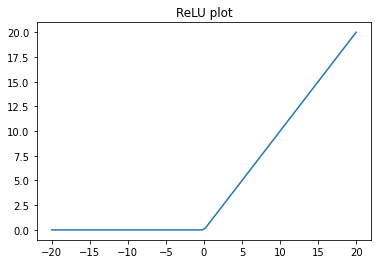

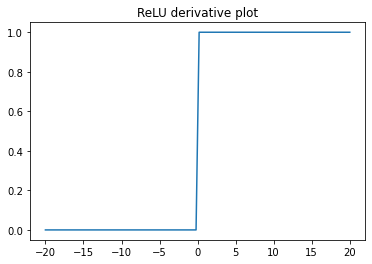

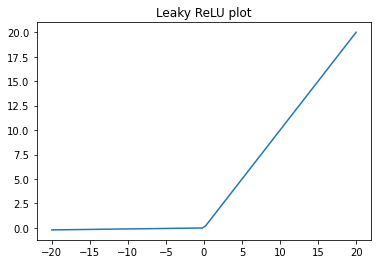

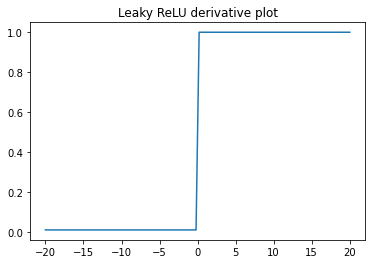

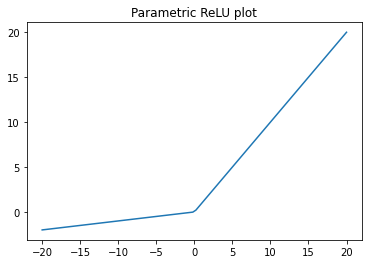

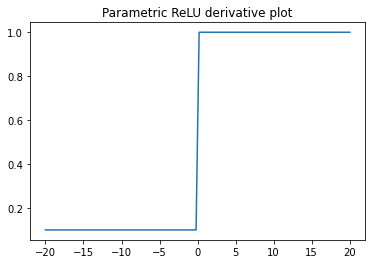

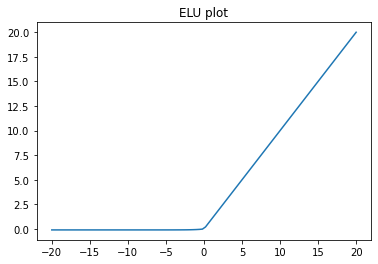

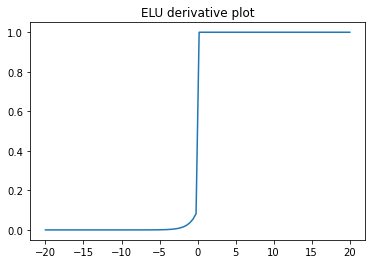

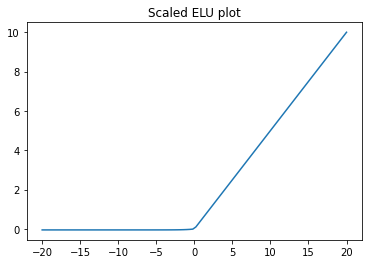

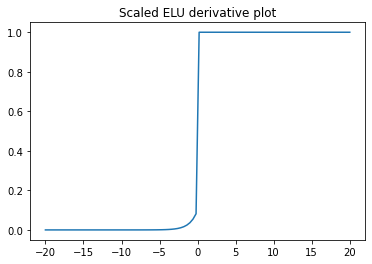

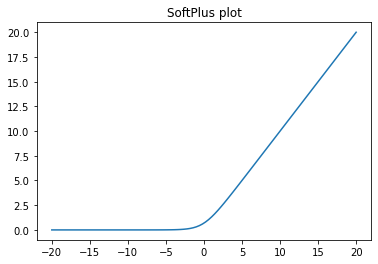

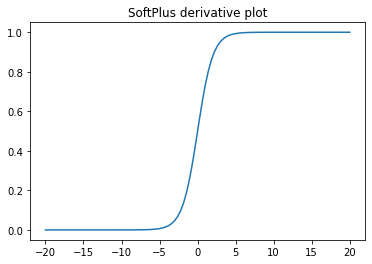

In [12]:
#Defining Input range
Input = np.linspace(-20,20,100)

#Defining required parameters
alpha = 0.1
lamda = 0.5

#Calculation and plotting via function call
plot_relu(Input,plot=1);
plot_leaky_relu(Input,plot=1);
plot_Parametric_relu(Input,alpha,plot=1);
plot_Exponential_relu(Input,alpha,plot=1);
plot_Scaled_Exponential_relu(Input,alpha,lamda,plot=1);
plot_Smooth_relu(Input,plot=1);

    
##### Q. 2. Build a CNN(LeNet5) model from scratch to recognize handwritten digit from the optical handwritten digit dataset(Use Sklearn Dataset and split dataset into training dataset (80%) and testing dataset (20%) ). Use a Stochastic gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the CNN model for 
- (a) Softmax loss function 
- (b) Focal loss function.
    - (i) Plot a comparative loss curve for at least 200 epochs. 
    - (ii) Print confusion matrix, calculate classification metrics such as precision, recall, f1-score and accuracy on test datset and ROC curve for each loss function. 
    - (iii) Repeat part (i) to (ii) using an Adam gradient descent algorithm 
    - (iv) Implement above CNN model with Keras/Tensorflow/Pytorch Library and verify the above results. 

##### Q.3. Build CNN(LeNet5) model from scratch to recognize diabetes-fromPima-Indians-diabetesdatabase (i.e. https://github.com/duonghuuphuc/keras/tree/master/dataset ). Use Adamgradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of theCNN model for Binary cross entropy loss function. 
- (i) Visualize input dataset and Plot comparative loss curve for at least 200 epochs. 
- (ii) Print confusion matrix, calculate classification metrics such as precision, recall, f1-score and accuracy on test datsetand ROC curve for each loss function. 
- (iii) Implement above CNN model with Keras/Tensorflow/Pytorch Library and verify the above results.

##### Q. 4. Build a CNNmodel from scratch to recognize human emotion using Facial emotionrecognition dataset (FER2013) (https://github.com/gitshanks/fer2013)(split dataset into training dataset (80%) and testing dataset (20%) ). For implementation, use a Adam gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the CNN model forthe Softmax loss function 
- (i)Visualize Facial emotion recognition dataset (FER2013). 
- (ii) Plot a comparative loss curve for at least 200 epochs. 
- (iii)Print confusion matrix, calculate classification metrics such as precision, recall, f1-score and accuracy on test dataset and ROC curve 
- (iv) Implement above CNN model withKeras/Tensorflow/Pytorch Library and verify the above results.